<a href="https://colab.research.google.com/github/Atifa14/EDGE-project-09/blob/main/Final_Project09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print ("Atifa")

Atifa


#Data Collection and Storage


In [ ]:
import csv

In [ ]:
with open("student_data.csv", "w", newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Student ID", "Student Name", "Subject", "Score", "Attendance Percentage", "Assignment Completion"])

In [ ]:
def add_record():

  with open("student_data.csv", "a") as file:
      writer = csv.writer(file)


      student_id = input("Enter Student ID : ")
      student_name = input("Enter Student Name: ")
      subject = input("Enter Subject: ")
      score = input("Enter Score: ")
      attendance = input("Enter Attendance Percentage: ")
      assignment = input("Enter Assignment Completion (Yes/No): ")
      writer.writerow([student_id, student_name, subject, score, attendance, assignment])

      file.close()

      print("Data written to student_data.csv")

In [ ]:
with open("student_data.csv", "r") as file:
    print(file.read())

Student ID,Student Name,Subject,Score,Attendance Percentage,Assignment Completion



**Interactive Console**

In [ ]:
while True:
  print("Menu")
  print("1. Add Record")
  print("2. Search Record")
  print("3. Update Record")
  print("4. Delete Record")
  print("5. Exit")
  choice = input("Enter your choice: (1-5) ")

  if choice == "1":
    add_record()
  if choice == "2":
    search_record()
  if choice == "3":
    update_record()
  if choice == "4":
    delete_record()
  if choice == "5":
    exit()
    break

Menu
1. Add Record
2. Search Record
3. Update Record
4. Delete Record
5. Exit
Enter your choice: (1-5) 1
Enter Student ID : 001
Enter Student Name: Atifa
Enter Subject: STA
Enter Score: 85
Enter Attendance Percentage: 80
Enter Assignment Completion (Yes/No): Yes
Data written to student_data.csv
Menu
1. Add Record
2. Search Record
3. Update Record
4. Delete Record
5. Exit
Enter your choice: (1-5) 1
Enter Student ID : 001
Enter Student Name: Atifa
Enter Subject: PHY
Enter Score: 82
Enter Attendance Percentage: 90
Enter Assignment Completion (Yes/No): No
Data written to student_data.csv
Menu
1. Add Record
2. Search Record
3. Update Record
4. Delete Record
5. Exit
Enter your choice: (1-5) 1
Enter Student ID : 002
Enter Student Name: Kafi
Enter Subject: SWE
Enter Score: 79
Enter Attendance Percentage: 80
Enter Assignment Completion (Yes/No): No
Data written to student_data.csv
Menu
1. Add Record
2. Search Record
3. Update Record
4. Delete Record
5. Exit
Enter your choice: (1-5) 1
Enter Stud

#Read CSV

In [ ]:
def getinfo(student_id):
  with open("student_data.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
      if row[0] == student_id:
       return row

In [ ]:
print(getinfo("001"))

['001', 'Atifa', 'STA', '85', '80', 'Yes']


**Modify score**

In [ ]:
def modify_score():
  student_id = input("Enter Student ID to modify: ")
  subject= input("Enter Subject to modify: ")
  with open("student_data.csv", "r") as file:
    reader = csv.reader(file)
    data= list(reader)
    for row in data:
      if row[0] == student_id and row[2] == subject:
        row[3] = input("Enter new score: ")
        break
        print("Subject not found")
        break
  with open("student_data.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(data)
    print("Score modified successfully")

In [ ]:
while True:
  print("Menu")
  print("1. Modify Score")
  print("2. Exit")
  choice = input("Enter your choice: (1-2) ")

  if choice == "1":
    modify_score()
  if choice == "2":
    exit()
    break

Menu
1. Modify Score
2. Exit
Enter your choice: (1-2) 1
Enter Student ID to modify: 003
Enter Subject to modify: BBA
Enter new score: 54
Score modified successfully
Menu
1. Modify Score
2. Exit
Enter your choice: (1-2) 2


**Saving to drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil
shutil.copy('student_data.csv', '/content/drive/My Drive/student_data.csv')

'/content/drive/My Drive/student_data.csv'

In [ ]:
with open('/content/drive/My Drive/student_data.csv', 'r') as file:
    print(file.read())

Student ID,Student Name,Subject,Score,Attendance Percentage,Assignment Completion
001,Atifa,STA,85,80,Yes
001,Atifa,PHY,82,90,No
002,Kafi,SWE,79,80,No
002,Kafi,MEE,65,70,Yes
003,samy,EEE,55,50,No
003,samy,CSE,45,80,Yes



#Data Analysis and Manipulation

**mean,min and max**

In [ ]:
import pandas as pd

In [ ]:
data= pd.read_csv("/content/drive/My Drive/student_data.csv")

In [ ]:
data

,Student ID,Student Name,Subject,Score,Attendance Percentage,Assignment Completion
0,1,Atifa,STA,85,80,Yes
1,1,Atifa,PHY,82,90,No
2,2,Kafi,SWE,79,80,No
3,2,Kafi,MEE,65,70,Yes
4,3,samy,EEE,55,50,No
5,3,samy,CSE,45,80,Yes


In [ ]:
student_stats= data.groupby(['Student ID','Student Name'])['Score'].agg(['mean', 'max', 'min'])
student_stats = student_stats.rename(columns={
    'mean': 'Average Score',
    'max': 'Highest Score',
    'min': 'Lowest Score'
})
print(student_stats)

                         Average Score  Highest Score  Lowest Score
Student ID Student Name                                            
1          Atifa                  83.5             85            82
2          Kafi                   72.0             79            65
3          samy                   50.0             55            45


**Attendence <75% or missing assignments**

In [ ]:
low_attendence_or_missing_assignments = data[(data['Attendance Percentage'] < 75) | (data['Assignment Completion'] == 'No')]
print(low_attendence_or_missing_assignments)

   Student ID Student Name Subject  Score  Attendance Percentage  \
1           1        Atifa     PHY     82                     90   
2           2         Kafi     SWE     79                     80   
3           2         Kafi     MEE     65                     70   
4           3         samy     EEE     55                     50   

  Assignment Completion  
1                    No  
2                    No  
3                   Yes  
4                    No  


**Filter students failing a subject**

In [ ]:
data['Score'] = pd.to_numeric(data['Score'])
failed_students = data[(data['Score'] < 80) & (data['Subject'] == 'SWE')][['Student ID','Student Name','Subject']]
print(failed_students)

   Student ID Student Name Subject
2           2         Kafi     SWE


**Convert score to integer**

In [ ]:
if data['Score'].dtype == 'str':
  data['Score'] = data['Score'].astype(int)
  print("Score is converted to an integer type.")
  if data['Score'].dtype == 'int64' or data['Score'].dtype == 'int32':
    print("Score is converted to an integer type.")

#Visualization

**Bar Chart of Average Score**

In [ ]:
import matplotlib.pyplot as plt

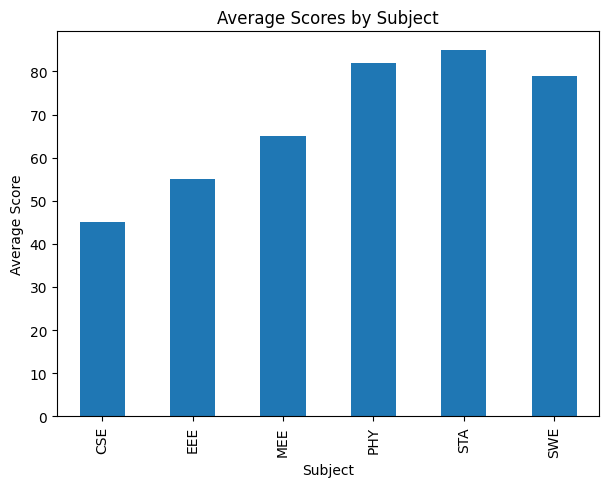

In [ ]:
average_scores = data.groupby('Subject')['Score'].mean()

average_scores.plot(kind='bar', figsize=(7, 5))
plt.title('Average Scores by Subject')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.show()

**Pie chart of attendence percentage categories**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

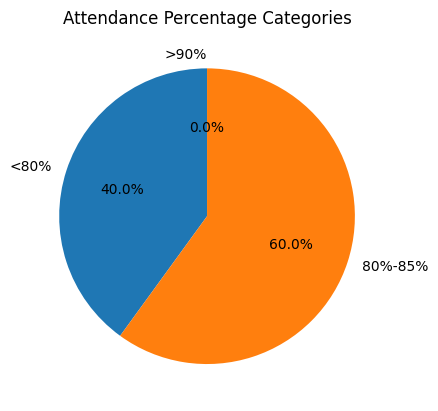

In [ ]:
data['Attendance Percentage'] = pd.to_numeric(data['Attendance Percentage'])


below_80 = data['Attendance Percentage'] < 80
between_80_85 = (data['Attendance Percentage'] >= 80) & (data['Attendance Percentage'] <= 85)
above_90 = data['Attendance Percentage'] > 90


counts = [below_80.sum(), between_80_85.sum(), above_90.sum()]
labels = ['<80%', '80%-85%', '>90%']

# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Attendance Percentage Categories')
plt.show()

**Creating a line graph**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
def lineplot_student_performance():
  student_id = int(input("Enter Student ID to plot: "))

  student_data = data[data['Student ID'] == student_id]

  plt.plot(student_data.index, student_data['Score'], marker='*')
  plt.title(f'Performance Trend for Student ID: {student_id}')
  plt.xlabel('Time')
  plt.ylabel('Score')
  plt.grid(True)
  plt.show()

Menu
1. Plot Student Performance
2. Exit
Enter your choice (1-2): 1
Enter Student ID to plot: 001


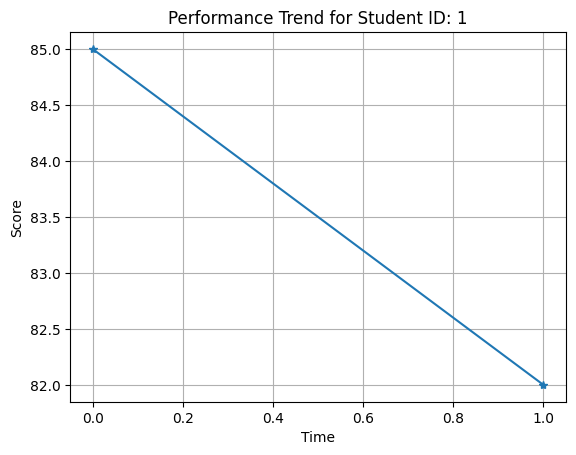

Menu
1. Plot Student Performance
2. Exit
Enter your choice (1-2): 2
Exiting the program


In [33]:
#generate line plot of student
while True:
  print("Menu")
  print("1. Plot Student Performance")
  print("2. Exit")

  choice = input("Enter your choice (1-2): ").strip()

  if choice == "1":
    lineplot_student_performance()
  if choice == "2":
    print("Exiting the program")
    break

#Applying Fuctions and Logic

**Calculating aggregate scores for each student**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/My Drive/student_data.csv")

In [ ]:
student_stats = data.groupby(['Student ID','Student Name'])['Score'].agg(['mean', 'max', 'min'])
student_stats = student_stats.rename(columns={
    'mean': 'Average Score',
    'max': 'Highest Score',
    'min': 'Lowest Score'
})
print(student_stats)

                         Average Score  Highest Score  Lowest Score
Student ID Student Name                                            
1          Atifa                  83.5             85            82
2          Kafi                   72.0             79            65
3          samy                   50.0             55            45


**Determining grade (A/B/C/Fail) based on scoring criteria**

In [ ]:
def assign_grade(score):
       if score >= 85:
           return 'A'
       elif score >= 80:
           return 'B'
       elif score >= 75:
           return 'C'
       else:
           return 'Fail'

In [ ]:
data['Grade'] = data['Score'].apply(assign_grade)
print(data)

   Student ID Student Name Subject  Score  Attendance Percentage  \
0           1        Atifa     STA     85                     80   
1           1        Atifa     PHY     82                     90   
2           2         Kafi     SWE     79                     80   
3           2         Kafi     MEE     65                     70   
4           3         samy     EEE     55                     50   
5           3         samy     CSE     45                     80   

  Assignment Completion Grade  
0                   Yes     A  
1                    No     B  
2                    No     C  
3                   Yes  Fail  
4                    No  Fail  
5                   Yes  Fail  


**Generating student performance reports in a user-friendly format**

In [29]:
def student_report():
    while True:
      student_id = int(input("Enter Student ID: "))
      student_data = data[data['Student ID'] == student_id]
      if student_data.empty:
        print("Student not found")
      else:
        print(f"Report for student ID: {student_id}")
        print(student_data[['Student ID','Student Name','Subject','Score']])



Empty DataFrame
Columns: [Student ID, Student Name, Subject, Score, Attendance Percentage, Assignment Completion, Grade]
Index: []


In [30]:
student_report()

Enter Student ID: 001
Report for student ID: 1
   Student ID Student Name Subject  Score
0           1        Atifa     STA     85
1           1        Atifa     PHY     82


KeyboardInterrupt: Interrupted by user